In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
from scipy.io import loadmat
from scipy.optimize import minimize
# theme
%pylab inline
pylab.rcParams['figure.figsize'] = (12, 8)
plt.style.use('ggplot')
from IPython.display import Image
# sklearn
from sklearn.svm import SVC

Populating the interactive namespace from numpy and matplotlib


### Support vector machines

#### Cost function 
$$
J(\theta) = \frac{1}{m} \sum_{i=1}^m y^{(i)} \ \text{cost}_1(\theta^Tx^{(i)}) + (1 - y^{(i)}) \ \text{cost}_0(\theta^Tx^{(i)}) + \dfrac{\lambda}{2m}\sum_{j=1}^n \Theta^2_j
$$

In [2]:
data = loadmat('res/ex6data1.mat')
print data.keys()

['y', 'X', '__version__', '__header__', '__globals__']


In [3]:
X = data['X']
y = data['y']

In [4]:
print X.shape
print y.shape

(51L, 2L)
(51L, 1L)


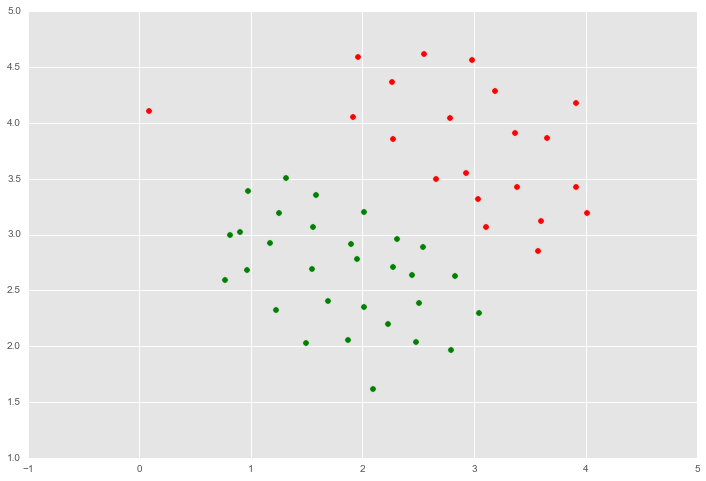

In [20]:
plt.scatter(X[:,0][y.flatten()==0],X[:,1][y.flatten()==0], c='g', s=40)
plt.scatter(X[:,0][y.flatten()==1],X[:,1][y.flatten()==1], c='r', s=40)

##### SVM when C=1

In [25]:
clf = SVC(C=1, kernel='linear')
clf.fit(X,y.flatten())

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0, degree=3, gamma=0.0,
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

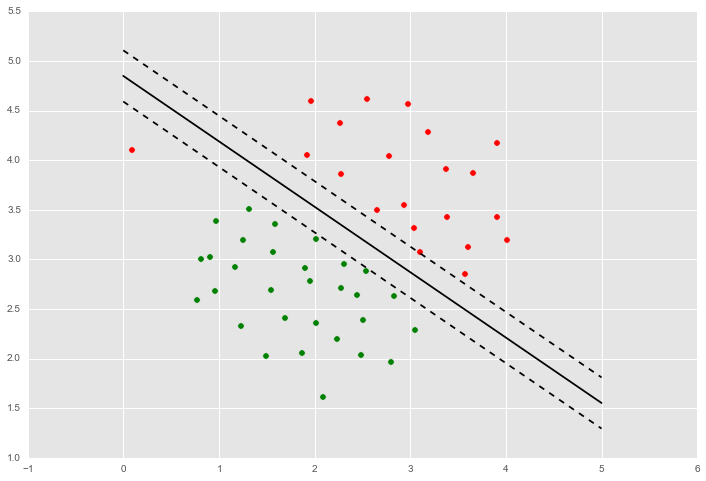

In [26]:
w = clf.coef_[0]
#print w
a = -w[0]/w[1] # slope
xx = np.linspace(0,5)
yy = a * xx - (clf.intercept_[0]) / w[1]
margin = 1 / np.sqrt(np.sum(clf.coef_ ** 2))
yy_down = yy + a * margin
yy_up = yy - a * margin
plt.plot(xx, yy, 'k-')
plt.plot(xx, yy_down, 'k--')
plt.plot(xx, yy_up, 'k--')
plt.scatter(X[:,0][y.flatten()==0],X[:,1][y.flatten()==0], c='g', s=40)
plt.scatter(X[:,0][y.flatten()==1],X[:,1][y.flatten()==1], c='r', s=40)

##### SVM when C=100

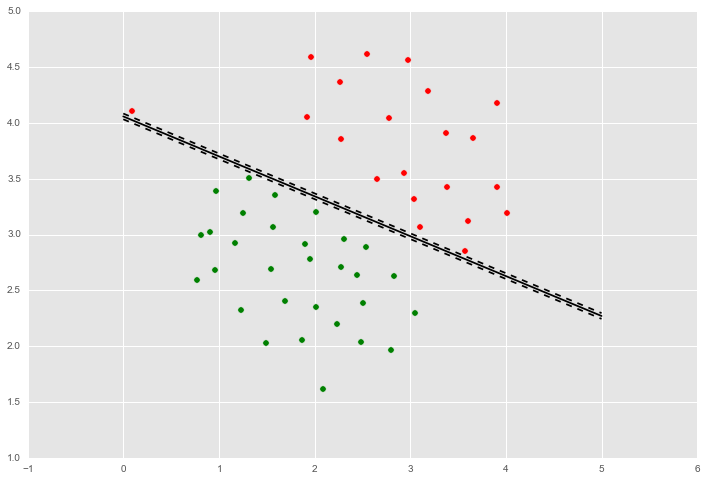

In [19]:
clf = SVC(C=100, kernel='linear')
clf.fit(X,y.flatten())
w = clf.coef_[0]
#print w
a = -w[0]/w[1] # slope
xx = np.linspace(0,5)
yy = a * xx - (clf.intercept_[0]) / w[1]
margin = 1 / np.sqrt(np.sum(clf.coef_ ** 2))
yy_down = yy + a * margin
yy_up = yy - a * margin
plt.plot(xx, yy, 'k-')
plt.plot(xx, yy_down, 'k--')
plt.plot(xx, yy_up, 'k--')
plt.scatter(X[:,0][y.flatten()==0],X[:,1][y.flatten()==0], c='g', s=40)
plt.scatter(X[:,0][y.flatten()==1],X[:,1][y.flatten()==1], c='r', s=40)

### Gaussian kernels

In [28]:
d= loadmat('res/ex6data2.mat')
print d.keys()

['y', 'X', '__version__', '__header__', '__globals__']


In [29]:
X = d['X']
y = d['y']

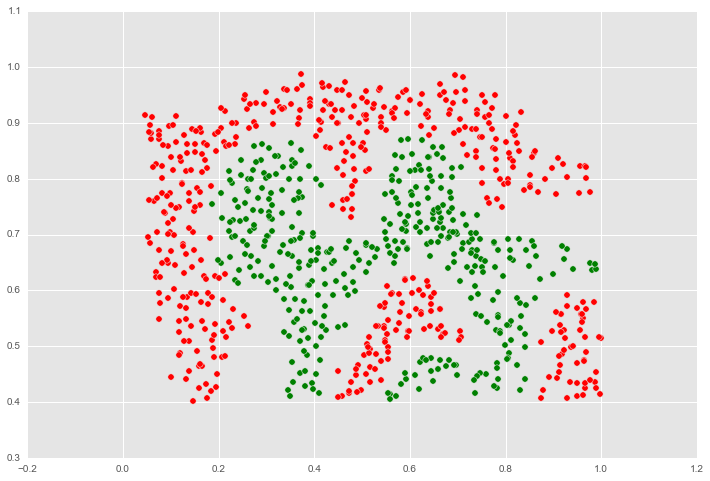

In [30]:
plt.scatter(X[:,0][y.flatten()==0],X[:,1][y.flatten()==0], c='g', s=40)
plt.scatter(X[:,0][y.flatten()==1],X[:,1][y.flatten()==1], c='r', s=40)

In [73]:
clf = SVC(kernel='rbf',gamma=6,C=100)
clf.fit(X,y.ravel())

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0, degree=3, gamma=6,
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [74]:
# create mesh
h = 0.02
x_min, x_max = X[:, 0].min() - 0.25, X[:, 0].max() + .25
y_min, y_max = X[:, 1].min() - .25, X[:, 1].max() + .25
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

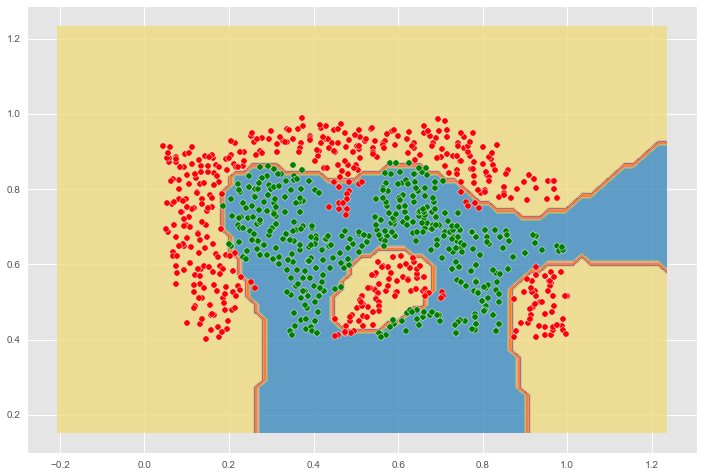

In [75]:
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)
plt.scatter(X[:,0][y.flatten()==0],X[:,1][y.flatten()==0], c='g', s=40)
plt.scatter(X[:,0][y.flatten()==1],X[:,1][y.flatten()==1], c='r', s=40)